## Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

pd.set_option('display.max_columns', None)

C:\Users\weslley.santos\AppData\Local\Temp\ipykernel_18844\2038934946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis

In [2]:
df = pd.read_excel('..\dataset\Sample - Superstore.xls')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
class SalesAnalyzer:
    """
    A class for analyzing and visualizing sales data.

    Attributes:
        df (pd.DataFrame): The input DataFrame containing sales data.
        column (str): The current column used for analysis.

    Methods:
        filter_df_copy(column):
            Create a filtered copy of the DataFrame based on the specified column.

        df_count(result_df_copy):
            Calculate the count of occurrences for each unique value in the specified column.

        plot(result_df_copy, product):
            Generate a line plot for the specified product based on the provided DataFrame.

        plot_sub_category_counts(result_df_copy, product):
            Generate a bar plot showing the presence of the specified product in each month.

    Usage:
        sales_analyzer = SalesAnalyzer(df)
        result_df_copy = sales_analyzer.filter_df_copy(column='Sub-Category')
        result_df_count = sales_analyzer.df_count(result_df_copy)
        sales_analyzer.plot(result_df_copy, product='Fasteners')
        sales_analyzer.plot_sub_category_counts(result_df_copy, product='Fasteners')
    """

    def __init__(self, df):
        """
        Initialize the SalesAnalyzer object.

        Parameters:
            df (pd.DataFrame): The input DataFrame containing sales data.
        """
        self.df = df
        self.column = None

    def filter_df_copy(self, column):
        """
        Create a filtered copy of the DataFrame based on the specified column.

        Parameters:
            column (str): The column to filter the DataFrame.

        Returns:
            pd.DataFrame: The filtered DataFrame.
        """
        self.column = column
        df_copy = self.df[['Order Date', column, 'Quantity']].copy()
        df_copy['MonthYear'] = df_copy['Order Date'].dt.to_period('M')
        df_copy.drop('Order Date', axis=1, inplace=True)
        result_df_copy = df_copy.groupby(['MonthYear', column]).sum().reorder_levels([column, 'MonthYear']).reset_index()
        
        return result_df_copy
    
    def df_count(self, result_df_copy):
        """
        Calculate the count of occurrences for each unique value in the specified column.

        Parameters:
            result_df_copy (pd.DataFrame): The DataFrame for counting occurrences.

        Returns:
            pd.DataFrame: The DataFrame containing counts for each unique value.
        """
        result_df_count = result_df_copy.copy()
        result_df_count = (
            result_df_copy.groupby(self.column)
            ['MonthYear']
            .count()
            .reset_index(name='Count')
            .sort_values('Count', ascending=False)
        )
        return result_df_count

    def plot(self, result_df_copy, product):
        """
        Generate a line plot for the specified product based on the provided DataFrame.

        Parameters:
            result_df_copy (pd.DataFrame): The DataFrame containing sales data.
            product (str): The specific product to plot.

        Returns:
            None
        """
        result_df_copy = result_df_copy.copy()
        result_df_copy['MonthYear'] = result_df_copy['MonthYear'].astype(str)
        fig = px.line(result_df_copy[result_df_copy[self.column] == product],
                      x='MonthYear',
                      y='Quantity',
                      markers=True,
                      title=f'{product} Sales Analysis',
                      labels={'Quantity': 'Quantity', 'MonthYear': 'MonthYear'})
        return fig.show()

    def plot_sub_category_counts(self, result_df_copy, product):
        """
        Generate a bar plot showing the presence of the specified product in each month.

        Parameters:
            result_df_copy (pd.DataFrame): The DataFrame containing sales data.
            product (str): The specific product to analyze.

        Returns:
            None
        """
        result_df_copy = result_df_copy.copy()
        result_df_copy['MonthYear'] = result_df_copy['MonthYear'].astype(str)
        product_data = result_df_copy[result_df_copy[self.column] == product]
        all_months = pd.period_range(start=product_data['MonthYear'].min(),
                                    end=product_data['MonthYear'].max(), freq='M')
        all_months_df = pd.DataFrame(index=all_months)
        all_months_df['MonthYear'] = all_months_df.index.astype(str)
        merged_data = pd.merge(all_months_df, product_data, on='MonthYear', how='left')
        fig = px.bar(merged_data, x='MonthYear', y='Quantity',
                    title=f'{product} Sales Presence in Each Month',
                    labels={'Quantity': 'Quantity', 'MonthYear': 'MonthYear'},
                    text='Quantity', hover_data=['Quantity'])
        return fig.show()


In [6]:
# Instanciando a classe SalesAnalyzer
sales_analyzer = SalesAnalyzer(df)
# Filtrando o DataFrame com base na coluna 'Product Name'
column = 'Category'
# Criando um DataFrame com os dados filtrados
result_df_copy = sales_analyzer.filter_df_copy(column)
# Contando a quantidade de ocorrências para cada valor único na coluna 'Product Name'
result_df_count = sales_analyzer.df_count(result_df_copy)

In [7]:
result_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   Category   144 non-null    object   
 1   MonthYear  144 non-null    period[M]
 2   Quantity   144 non-null    int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 3.5+ KB


In [8]:
result_df_count

,Category,Count
0,Furniture,48
1,Office Supplies,48
2,Technology,48


In [9]:
product = 'Furniture'
sales_analyzer.plot(result_df_copy, product)
sales_analyzer.plot_sub_category_counts(result_df_copy, product)

In [10]:
# Comparando os campos Product ID e Product Name, nota-se que há produtos com o mesmo nome, mas com IDs diferentes.
# Portanto, optou-se por utilizar o campo Product Name para identificar os produtos. 

df_filtered = df[df.groupby('Product Name')['Product ID'].transform('nunique') > 1]
pd.DataFrame(df_filtered.groupby('Product Name')['Product ID'].nunique()).reset_index().rename(columns={'Product ID': 
                                                                                                        'Product ID Count'}).sort_values(by='Product ID Count', 
                                                                                                                                         ascending=False)

,Product Name,Product ID Count
13,Staples,10
8,Staple envelope,9
2,Easy-staple paper,8
14,Staples in misc. colors,7
9,Staple holder,3
11,Staple remover,3
0,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
1,Avery Non-Stick Binders,2
3,Eldon Wave Desk Accessories,2
4,KI Adjustable-Height Table,2


## ARIMA

In [11]:
result_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   Category   144 non-null    object   
 1   MonthYear  144 non-null    period[M]
 2   Quantity   144 non-null    int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 3.5+ KB


In [12]:
print(result_df_copy)

            Category MonthYear  Quantity
0          Furniture   2014-01        70
1    Office Supplies   2014-01       169
2         Technology   2014-01        45
3          Furniture   2014-02        23
4    Office Supplies   2014-02       103
..               ...       ...       ...
139  Office Supplies   2017-11      1093
140       Technology   2017-11       383
141        Furniture   2017-12       394
142  Office Supplies   2017-12      1061
143       Technology   2017-12       268

[144 rows x 3 columns]


In [17]:
data = result_df_copy.copy()
data['MonthYear'] = pd.to_datetime(data['MonthYear'], format='%Y-%m')
data


TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   Category   144 non-null    object   
 1   MonthYear  144 non-null    period[M]
 2   Quantity   144 non-null    int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 3.5+ KB


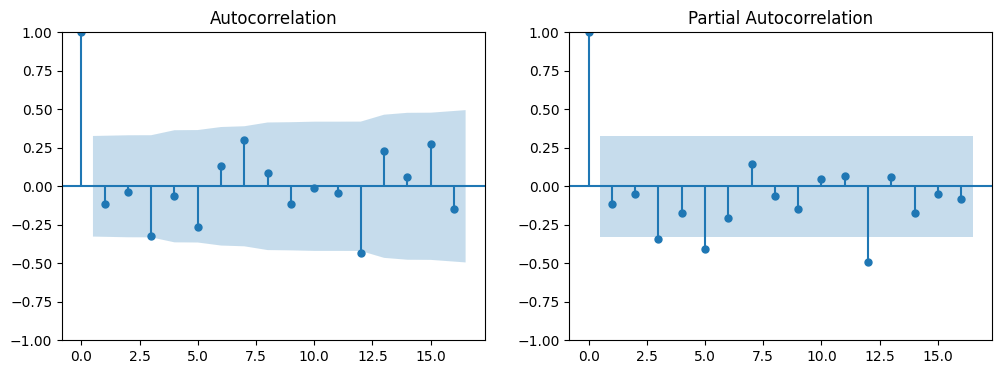

c:\Users\weslley.santos\Documents\CASE-IA\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\weslley.santos\Documents\CASE-IA\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\weslley.santos\Documents\CASE-IA\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\weslley.santos\Documents\CASE-IA\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\weslley.santos\Documents\CASE-IA\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No 

AttributeError: 'PredictionResults' object has no attribute 'index'

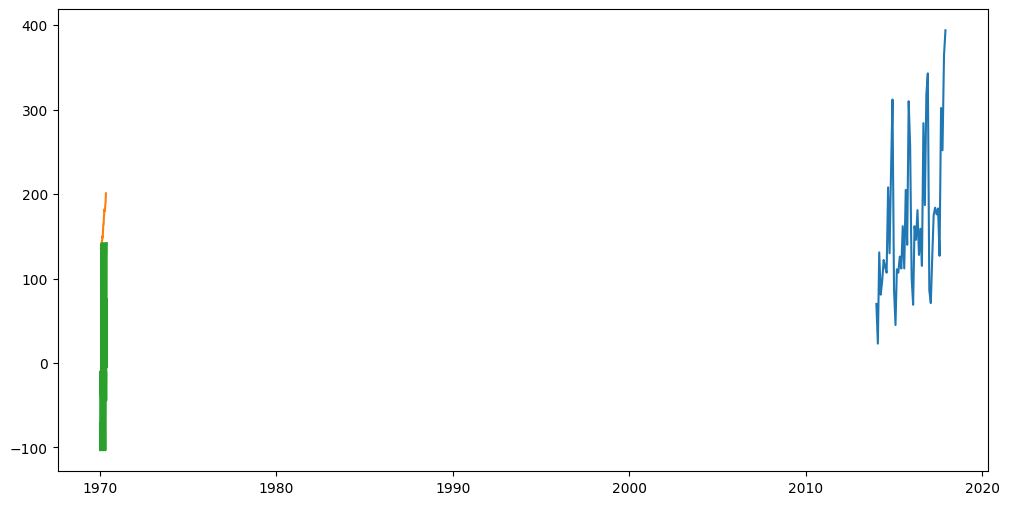

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
from datetime import datetime, timedelta

# Function to fit ARIMA model and make predictions
def fit_arima_and_predict(data, category):
    # Extract data for the specific category
    category_data = data[data['Category'] == category]

    # Decompose the time series (trend, seasonal, residual)
    result = seasonal_decompose(category_data['Quantity'], model='additive', period=12)
    trend = result.trend.dropna()
    seasonal = result.seasonal.dropna()
    residual = result.resid.dropna()

    # Identify the order for ARIMA using ACF and PACF plots
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(residual, ax=ax[0])
    plot_pacf(residual, ax=ax[1])
    plt.show()

    # Fit ARIMA model on the residuals
    order = (1, 0, 0)  # Example order, adjust based on ACF and PACF plots
    seasonal_order = (0, 1, 1, 12)  # Example seasonal order, adjust based on ACF and PACF plots

    model = SARIMAX(category_data['Quantity'], order=order, seasonal_order=seasonal_order)
    fit_model = model.fit()

    # Forecast future values
    forecast_steps = 12
    forecast = fit_model.get_forecast(steps=forecast_steps)

    # Plot the original data, trend, seasonal, and predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(category_data['MonthYear'], category_data['Quantity'], label='Original Data')
    plt.plot(trend.index, trend, label='Trend')
    plt.plot(seasonal.index, seasonal, label='Seasonal')
    plt.plot(forecast.index, forecast.predicted_mean, label='Forecast')
    plt.legend()
    plt.title(f'ARIMA Forecast for {category}')
    plt.show()


# Loop through each unique category and fit ARIMA model
for category in df['Category'].unique():
    fit_arima_and_predict(data, category)

In [157]:
print(result_df_copy)

            Category MonthYear  Quantity
0          Furniture   2014-01        70
1    Office Supplies   2014-01       169
2         Technology   2014-01        45
3          Furniture   2014-02        23
4    Office Supplies   2014-02       103
..               ...       ...       ...
139  Office Supplies   2017-11      1093
140       Technology   2017-11       383
141        Furniture   2017-12       394
142  Office Supplies   2017-12      1061
143       Technology   2017-12       268

[144 rows x 3 columns]


## SARIMAX

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def sarimax_pipeline(df, target_column, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), train_size=0.8):
    df['MonthYear'] = pd.to_datetime(df['MonthYear'])
    df = df.set_index('MonthYear')

    train_size = int(len(df) * train_size)
    train, test = df[:train_size], df[train_size:]

    model = SARIMAX(train[target_column], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
    
    mse = mean_squared_error(test[target_column], predictions)
    print(f'Mean Squared Error: {mse}')

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train[target_column], label='Train')
    plt.plot(test.index, test[target_column], label='Test')
    plt.plot(test.index, predictions, label='SARIMAX Predictions')
    plt.legend()
    plt.show()

    return model_fit, predictions

# Usage
sarimax_model, sarimax_predictions = sarimax_pipeline(df, target_column='Quantity', order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

## NeuralProphet

In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def neuralprophet_pipeline(df, target_column, train_size=0.8):
    df = df.rename(columns={'MonthYear': 'ds', target_column: 'y'})
    
    train_size = int(len(df) * train_size)
    train, test = df[:train_size], df[train_size:]

    model = NeuralProphet()
    model.fit(train, freq='M')

    future = model.make_future_dataframe(test, periods=len(test))
    forecast = model.predict(future)

    mse = mean_squared_error(test['y'], forecast['yhat1'][-len(test):])
    print(f'Mean Squared Error: {mse}')

    fig = model.plot(forecast)
    plt.show()

    return model, forecast

# Usage
neuralprophet_model, neuralprophet_forecast = neuralprophet_pipeline(df, target_column='Quantity')

## LSTM

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

def lstm_pipeline(df, target_column, num_epochs=100, learning_rate=0.01, train_size=0.8):
    df['MonthYear'] = pd.to_datetime(df['MonthYear'])
    df = df.set_index('MonthYear')

    train_size = int(len(df) * train_size)
    train, test = df[:train_size], df[train_size:]

    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train[[target_column]])
    test_scaled = scaler.transform(test[[target_column]])

    train_scaled = torch.FloatTensor(train_scaled).view(-1)
    test_scaled = torch.FloatTensor(test_scaled).view(-1)

    def create_inout_sequences(input_data, tw):
        inout_seq = []
        L = len(input_data)
        for i in range(L-tw):
            train_seq = input_data[i:i+tw]
            train_label = input_data[i+tw:i+tw+1]
            inout_seq.append((train_seq ,train_label))
        return inout_seq

    train_window = 12
    train_inout_seq = create_inout_sequences(train_scaled, train_window)

    model = LSTM()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        for seq, labels in train_inout_seq:
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                                torch.zeros(1, 1, model.hidden_layer_size))

            y_pred = model(seq)

            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()

    fut_pred = len(test)
    test_inputs = train_scaled[-train_window:].tolist()
    model.eval()

    for i in range(fut_pred):
        seq = torch.FloatTensor(test_inputs[-train_window:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))
            test_inputs.append(model(seq).item())

    actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:]).reshape(-1, 1))

    mse = mean_squared_error(test[target_column][train_window:], actual_predictions)
    print(f'Mean Squared Error: {mse}')

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train[target_column], label='Train')
    plt.plot(test.index[train_window:], test[target_column][train_window:], label='Test')
    plt.plot(test.index[train_window:], actual_predictions, label='LSTM Predictions')
    plt.legend()
    plt.show()

    return model, actual_predictions

# Usage
lstm_model, lstm_predictions = lstm_pipeline(df, target_column='Quantity')